Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.
- Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes


In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [10]:
df.shape

(768, 9)

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [19]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [20]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=54,test_size=0.30)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train,y_train)


KNeighborsClassifier()

In [26]:
y_pred = clf.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,ConfusionMatrixDisplay

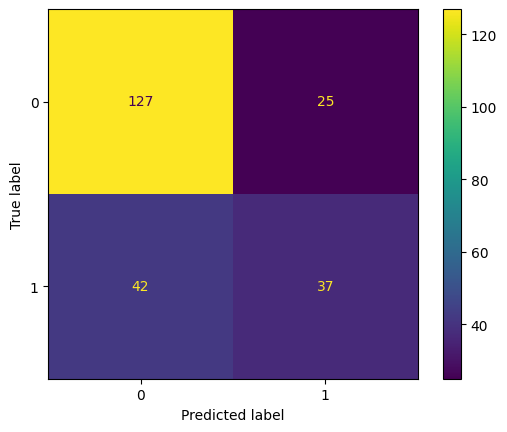

In [50]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [30]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.70995670995671


In [31]:
print("Precision Score: ",precision_score(y_test,y_pred))

Precision Score:  0.5967741935483871


In [32]:
print("Recall Score: ",recall_score(y_test,y_pred))

Recall Score:  0.46835443037974683


In [33]:
print("F1 Score: ",f1_score(y_test,y_pred))

F1 Score:  0.524822695035461


After Balancing The Dataset

In [38]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
sampled_df = sampler.fit_resample(x,y)
print(x_sampled.shape)
print(y_sampled.shape)

(1000, 8)
(1000,)


In [39]:
sampled_x_train,sampled_x_test,sampled_y_train,sampled_y_test = train_test_split(x_sampled,y_sampled,random_state=54,test_size=0.30)

In [40]:
clf.fit(sampled_x_train,sampled_y_train)

KNeighborsClassifier()

In [41]:
sampled_y_pred = clf.predict(sampled_x_test)

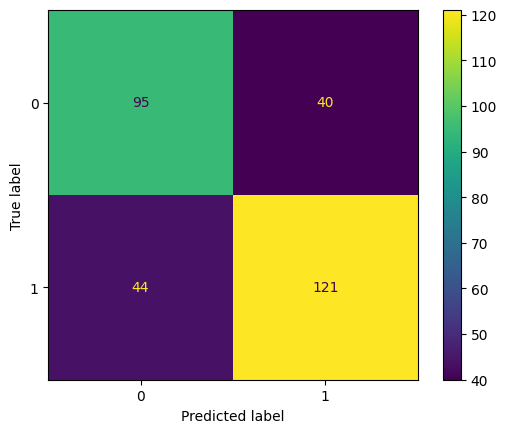

In [51]:
cm = confusion_matrix(sampled_y_test,sampled_y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [52]:
print("Accuracy: ",accuracy_score(sampled_y_test,sampled_y_pred))

Accuracy:  0.72


In [53]:
print("Precision Score: ",precision_score(sampled_y_test,sampled_y_pred))

Precision Score:  0.7515527950310559


In [54]:
print("Recall Score: ",recall_score(sampled_y_test,sampled_y_pred))

Recall Score:  0.7333333333333333


In [55]:
print("F1 Score: ",f1_score(sampled_y_test,sampled_y_pred))

F1 Score:  0.7423312883435583
